In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
from PIL import  Image
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected = True)#visualization
import plotly.graph_objs as go#visualization
import plotly.subplots as tls#visualization
import plotly.figure_factory as ff#visualization

print("Modules imported successfully :)")

Modules imported successfully :)


## Loading The Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Data Overview

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,6024-RUGGH,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [6]:
print("No. of Rows = ", df.shape[0])
print("No. of Columns = ", df.shape[1])
print("\nFeatures :\n", df.columns.tolist())
print("\nNo. missing values = ", df.isnull().sum().values.sum())
print("\nUnique Values : \n", df.nunique())

No. of Rows =  7043
No. of Columns =  21

Features :
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

No. missing values =  0

Unique Values : 
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [7]:
pandas_profiling.ProfileReport(df)

## Data Preparation

From our dataframe profile, we found that "TotalCharges" Column has missing values disguised as an empty space. So, we'll replace spaces with NaN values.

In [8]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

Dropping rows that have Null (TotalCharges) values.

In [9]:
df = df[df['TotalCharges'].notnull()]

In [10]:
df = df.reset_index()[df.columns]

Convert "TotalCharges" to float type

In [11]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

We found a redundant category for some columns, which is "No internet service". So, we add it to the "No" category in the following columns.

In [12]:
replace_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies']

In [13]:
for column in replace_columns:
    df[column] = df[column].replace({'No internet service' : 'No'})

In [14]:
df[replace_columns].nunique()

OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
dtype: int64

Convert "SeniorCitizen" unique values from 0, 1 to 'No', and 'Yes'. To be able to properly encode it as a categorical feature.

In [15]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1 : "Yes", 0 : "No"})

In [16]:
#Tenure to categorical column
def tenure_lab(df) :
    
    if df["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "Tenure_48-60"
    elif df["tenure"] > 60 :
        return "Tenure_gt_60"
    
df["tenure_group"] = df.apply(lambda df: tenure_lab(df),axis = 1)

In [17]:
df['tenure_group']

0        Tenure_0-12
1       Tenure_24-48
2        Tenure_0-12
3       Tenure_24-48
4        Tenure_0-12
            ...     
7027    Tenure_12-24
7028    Tenure_gt_60
7029     Tenure_0-12
7030     Tenure_0-12
7031    Tenure_gt_60
Name: tenure_group, Length: 7032, dtype: object

In [18]:
#separating Churn and non Churn customers into separate dataframes
churn_df = df[df['Churn'] == "Yes"]
non_churn_df = df[df["Churn"] == "No"]

In [19]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Tenure_0-12
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Tenure_24-48
13,0280-XJGEX,Male,No,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,Tenure_48-60


In [20]:
non_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,Tenure_12-24
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,Tenure_0-12


Separating Categorical and Numerical Columns

In [21]:
numerical_columns = df.dtypes[(df.dtypes == np.int64) | (df.dtypes == np.float64)].index.tolist()

In [22]:
numerical_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [23]:
categorical_columns = df.dtypes[df.dtypes == np.object].index.tolist()

In [24]:
categorical_columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure_group']

Our Target Column is "Churn", so we remove it from our categorical columns list.

Remove customerID from Categorical Columns

In [25]:
categorical_columns.remove('customerID')

In [26]:
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure_group']

Checking The cardinality of our categorical columns

In [27]:
df[categorical_columns].nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
tenure_group        5
dtype: int64

## Exploratory Data Analysis

Customer Churn Pie Chart

In [28]:
data = df["Churn"].value_counts().values.tolist() 
labels = df["Churn"].value_counts().index.tolist()
labels

['No', 'Yes']

([<matplotlib.patches.Wedge at 0x7fa94ed92fd0>,
 [Text(-0.7383051242403968, 0.8154174044747711, 'No'),
  Text(0.7383051242403964, -0.8154174044747714, 'Yes')],
 [Text(-0.40271188594930735, 0.44477312971351146, '73.4%'),
  Text(0.40271188594930707, -0.44477312971351163, '26.6%')])

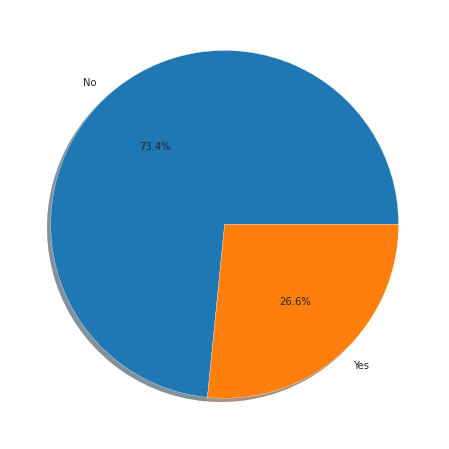

In [29]:
fig, ax = plt.subplots(1,1, figsize = (12,8))
plt.pie(data, labels = labels, autopct = '%1.1f%%', shadow = True)

## Data Preprocessing

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [31]:
binary_columns = df.nunique()[df.nunique() == 2].index.tolist()

In [32]:
binary_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [33]:
categorical_columns = [column for column in categorical_columns if column not in binary_columns]

In [34]:
categorical_columns

['MultipleLines',
 'InternetService',
 'Contract',
 'PaymentMethod',
 'tenure_group']

In [35]:
#Label Encoding binary columns:
lencoder = LabelEncoder()
for col in binary_columns:
    df[col] = lencoder.fit_transform(df[col])

In [36]:
#OneHotEncoding Categorical Columns with get dummies:
df = pd.get_dummies(df, columns = categorical_columns)

In [37]:
#Scaling Numerical Columns:
scaler = StandardScaler()
scaled = scaler.fit_transform(df[numerical_columns])
scaled = pd.DataFrame(scaled, columns = numerical_columns)

In [38]:
#Dropping unscaled numerical columns and merging scaled values with encoded ones

df = df.drop(columns = numerical_columns, axis = 1)
df = df.merge(scaled, left_index = True, right_index = True, how = "left")

In [39]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457


In [40]:
df.describe(include = "all")

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
count,7032,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.00000,7032.000000,7032.000000,7032.000000,7.032000e+03,7.032000e+03,7.032000e+03
unique,7032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,6024-RUGGH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.504693,0.162400,0.482509,0.298493,0.903299,0.286547,0.344852,0.343857,0.290102,...,0.336320,0.228100,0.309300,0.14562,0.226678,0.118316,0.200085,-1.214741e-16,9.652878e-17,-1.172113e-16
std,NaN,0.500014,0.368844,0.499729,0.457629,0.295571,0.452180,0.475354,0.475028,0.453842,...,0.472483,0.419637,0.462238,0.35275,0.418712,0.323005,0.400092,1.000071e+00,1.000071e+00,1.000071e+00
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,9.199259e-01,8.331482e-01,6.668271e-01


## Model Building

### 1- Baseline Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

Splitting The Data Into Train and Test Data

In [42]:
train_df, test_df = train_test_split(df, test_size = 0.25, random_state = 111)

In [43]:
important_columns = df.columns.tolist()

In [44]:
#Separating Dependent and Independent Variables
important_columns = [col for col in important_columns if col not in ['customerID', 'Churn']]

In [45]:
X_train = train_df[important_columns]
y_train = train_df['Churn']
X_test = test_df[important_columns]
y_test = test_df['Churn']

Churn Prediction Function

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1268
           1       0.69      0.53      0.60       490

    accuracy                           0.80      1758
   macro avg       0.76      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758

Accuracy score :  0.8026166097838453
Area under curve :  0.7185443893645785 



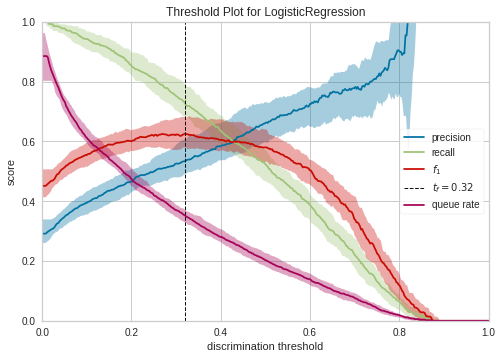

In [46]:
def churn_pred(algorithm, x_train, x_test, y_train, y_test, cols, cf, threshold_plot):
    #model
    algorithm.fit(x_train, y_train)
    predictions = algorithm.predict(x_test)
    probabilities = algorithm.predict_proba(x_test)
    
    #Coefficients
    
    if cf == "coefficients":
        coefficients = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features":
        coefficients = pd.DataFrame(algorithm.feature_importances_)
        
    columns_df = pd.DataFrame(cols)
    coef_summary = (pd.merge(coefficients, columns_df, left_index = True, right_index = True, how = "left"))
    coef_summary.columns = ["coefficients", "features"]
    coef_summary = coef_summary.sort_values(by = "coefficients", ascending = False)
    
    print(algorithm)
    print("\n Classification report : \n", classification_report(y_test, predictions))
    print("Accuracy score : ", accuracy_score(y_test, predictions))
    
    #Confusion Matrix
    conf_matrix = confusion_matrix(y_test, predictions)
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(y_test, predictions)
    print("Area under curve : ", model_roc_auc, "\n")
    fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_summary["features"],y = coef_summary["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_summary["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(X_train,y_train)
        visualizer.poof()
        
        
logit = LogisticRegression(C = 1.0, dual = False, fit_intercept = True,
                          intercept_scaling = 1, max_iter = 100, multi_class = 'ovr', n_jobs = 1,
                          penalty = 'l2', random_state = None, solver = 'liblinear', tol = 0.0001,
                          verbose = 0, warm_start = False)

churn_pred(logit, X_train, X_test, y_train, y_test, important_columns, "coefficients", threshold_plot = True)

### KNN Classifier

KNeighborsClassifier(n_jobs=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      1268
           1       0.59      0.50      0.54       490

    accuracy                           0.76      1758
   macro avg       0.70      0.68      0.69      1758
weighted avg       0.75      0.76      0.76      1758

Accuracy Score   :  0.7627986348122867
Area under curve :  0.6815505697547157


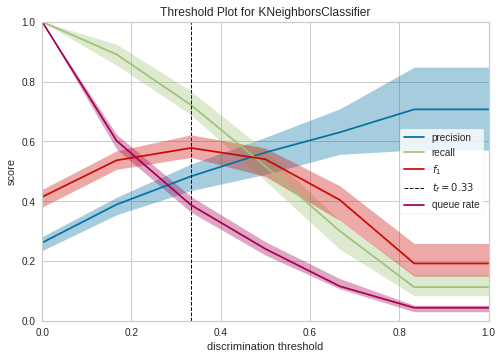

In [47]:
def telecom_churn_prediction_alg(algorithm, X_train, X_test,
                                 y_train, y_test,threshold_plot = True) :
    
    #model
    algorithm.fit(X_train, y_train)
    predictions   = algorithm.predict(X_test)
    probabilities = algorithm.predict_proba(X_test)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(y_test,predictions))
    print ("Accuracy Score   : ",accuracy_score(y_test,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(y_test,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(y_test,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])
     
    #plot roc curve
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    trace3 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(X_train, y_train)
        visualizer.poof()

    
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
telecom_churn_prediction_alg(knn,X_train, X_test,
                             y_train,y_test,threshold_plot = True)

### Gaussian Naive Bayes

GaussianNB()

 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1268
           1       0.55      0.79      0.65       490

    accuracy                           0.76      1758
   macro avg       0.73      0.77      0.74      1758
weighted avg       0.80      0.76      0.77      1758

Accuracy Score   :  0.7627986348122867
Area under curve :  0.7704548380866543


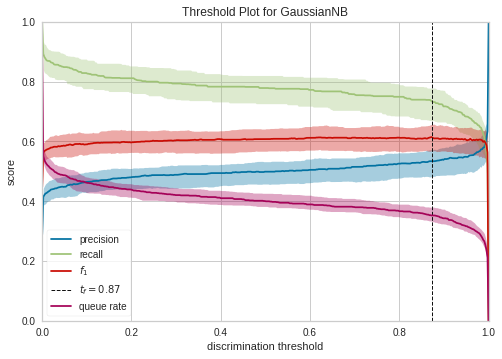

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)

telecom_churn_prediction_alg(gnb,X_train,X_test,y_train,y_test)

### Support Vector Machine

In [50]:
from sklearn.svm import SVC

#Support vector classifier
#using linear hyper plane
svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

cols = [i for i in df.columns if i not in ['customerID', 'Churn']]
churn_pred(svc_lin,X_train,X_test,y_train,y_test,
                         cols,"coefficients",threshold_plot = False)

SVC(gamma=1.0, kernel='linear', probability=True)

 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.92      0.86      1268
           1       0.69      0.47      0.56       490

    accuracy                           0.79      1758
   macro avg       0.75      0.69      0.71      1758
weighted avg       0.78      0.79      0.78      1758

Accuracy score :  0.7929465301478953
Area under curve :  0.6924322410352154 



### Tuning Parameters For Support Vector Machine

In [51]:
#tuning parameters
#Support vector classifier
#using non-linear hyper plane("rbf")

svc_rbf  = SVC(C=1.0, kernel='rbf', 
               degree= 3, gamma=1.0, 
               coef0=0.0, shrinking=True,
               probability=True,tol=0.001,
               cache_size=200, class_weight=None,
               verbose=False,max_iter= -1,
               random_state=None)

telecom_churn_prediction_alg(svc_rbf, X_train,X_test, y_train,y_test,threshold_plot = False)

SVC(gamma=1.0, probability=True)

 Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      1268
           1       0.68      0.36      0.47       490

    accuracy                           0.77      1758
   macro avg       0.74      0.65      0.66      1758
weighted avg       0.76      0.77      0.75      1758

Accuracy Score   :  0.7741751990898749
Area under curve :  0.6456109573166806
